# **Library's Import**

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report

# **EDA (DATA UNDERSTANDING)**


1.Uploading CSV file.

2.Info.

3.Rows and Column.

4.Keys works.

5.Head & tail.

6.Null values.

7.Duplicate values.

8.nunique Values all rows

In [2]:
# Uploding CSV file
data=pd.read_csv("/kaggle/input/loan-approval-data-set/Loan_Train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**1.**We can see the there are some numerical value in data set.

**2.**Our target vairable is "Loan Status"

In [4]:
print("number of Rows",data.shape[0])
print("number of column",data.shape[1])

number of Rows 614
number of column 13


In the data set there are **13 Rows**(Horizontal),and **614 column**(Vertical)

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We found 13 unique kyes

1**.Loan ID**-- Customer ID **unique Id**

2.**Gender**-- male & female

3.**Married**-- Yes & No

4.**Dependents**-- 0 OR 1

5.**Education**-- Graduate OR under graduate

6.**Self Employed**-- Yes & no

7.**Applicant Income**-- Applicant Yearly Income.

8.**Co-applicant Income**-- Co-applicant Income

9.**LoanAmount**-- Loan amount in thousands

10.**Loan Amount Term**-- Term loan in months

11.**Credit History**-- credit history meets guidelines

12.**Property Area**-- Urban/ Semi Urban/ Rural

13.**Loan Status**--  Loan approved Yes or No (**Target**)


In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


First five Rows & Columns

In [7]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


last five Rows & Columns

In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The dataset contains null values.

In [9]:
data.isnull().sum().sum()

149

Sum of Null value.

In [10]:
data.duplicated().sum()

0

There are no duplicate values in the dataset.

In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We calculate statistical data.

In [12]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [13]:
data["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

The gender column includes male, female, and null

In [14]:
data["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

The Married column includes No, Yes, and null

In [15]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

The Dependents column includes 1, 2, 3+ and null

In [16]:
data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

The Education column includes Graduate, Not Graduate.

In [17]:
data["Credit_History"].unique()

array([ 1.,  0., nan])

The Credit History column includes 1, 0, null.

#**DATA CLEANING**



In [18]:
data["Loan_Status"]=data["Loan_Status"].replace({"N":"No","Y":"Yes"})
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Yes
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,No
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Yes
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Yes
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Yes
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Yes
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Yes
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Yes


To make the Loan Status column more understandable, **we change the "N" with "NO" and the "Y" with "Yes".**

In [19]:
data["Dependents"] = data["Dependents"].replace({"3+": 3})
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Yes
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,No
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Yes
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Yes
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Yes
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Yes
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Yes
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Yes


we change the "3+" with "3".

In [20]:
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)
data["Married"].fillna(data["Married"].mode()[0],inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)
data["LoanAmount"].fillna(data["LoanAmount"].mean(),inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean(),inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mean(),inplace=True)

**Filling Null** **value** using fillna function.

In [21]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

After filling the null value, there are no more null values in the data set.

# **Visualization**

In [22]:
data_count=data["Loan_Status"].value_counts()
size = data["Loan_Status"].value_counts()
data_count
size

Loan_Status
Yes    422
No     192
Name: count, dtype: int64

**1.**Counting the Yes or No.

**2.**Size define

([<matplotlib.patches.Wedge at 0x7c8ad6dbca30>,
 [Text(-0.6105420895241798, 0.9150072988339757, ''),
  Text(0.6105420038550106, -0.9150073559970479, '')],
 [Text(-0.33302295792227987, 0.4990948902730776, '68.7%'),
  Text(0.3330229111936421, -0.49909492145293516, '31.3%')])

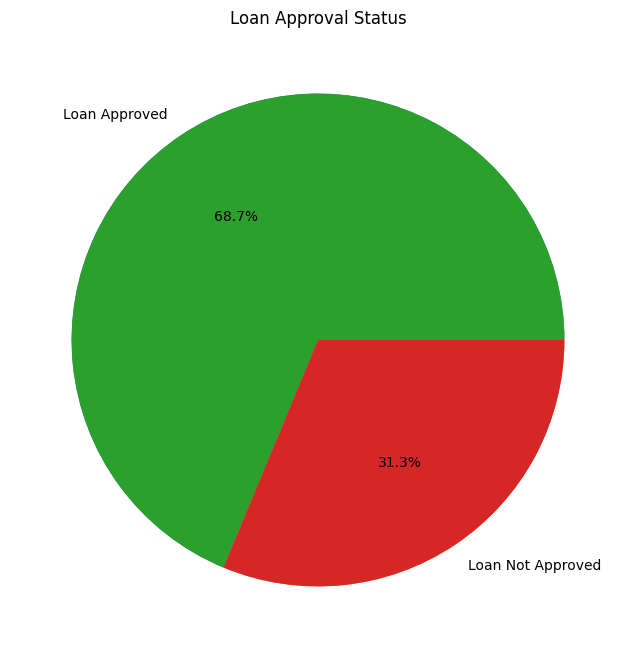

In [23]:
plt.figure(figsize=(8, 8))
plt.pie(data_count, labels=["Loan Approved", "Loan Not Approved"])
plt.title("Loan Approval Status")
plt.pie(size, autopct="%.1f%%")

 1.we can see that our target vairable distribution is highly imblanced.

2.Majority of the customers is geting loan approved (Yes) 68.7%.

3.Only 31.3% has (Not) loan not approved.

<Axes: xlabel='Married', ylabel='count'>

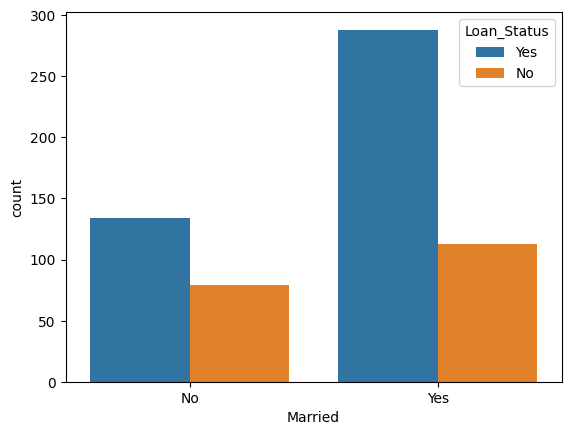

In [24]:
sns.countplot(data=data, x="Married",hue="Loan_Status")

Those who are married have higher chances of getting a loan approved.

In [25]:
pd.crosstab(data["Married"],data["Loan_Status"],margins=True)

Loan_Status,No,Yes,All
Married,,,
No,79,134,213
Yes,113,288,401
All,192,422,614


<Axes: xlabel='Education', ylabel='count'>

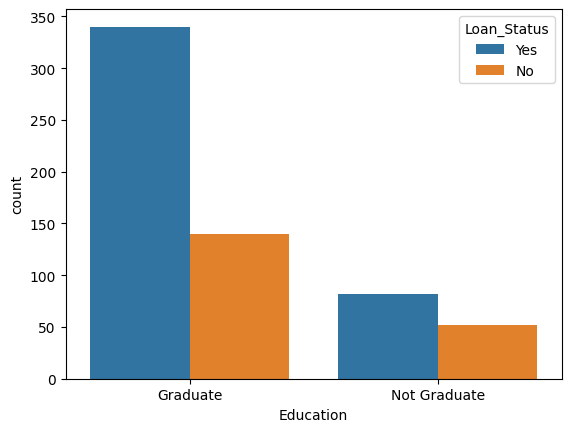

In [26]:
sns.countplot(data=data, x="Education",hue="Loan_Status")

Those that are educated are better able to get their loans approved

In [27]:
pd.crosstab(data["Education"],data["Loan_Status"],margins=True)

Loan_Status,No,Yes,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


<Axes: xlabel='Property_Area', ylabel='count'>

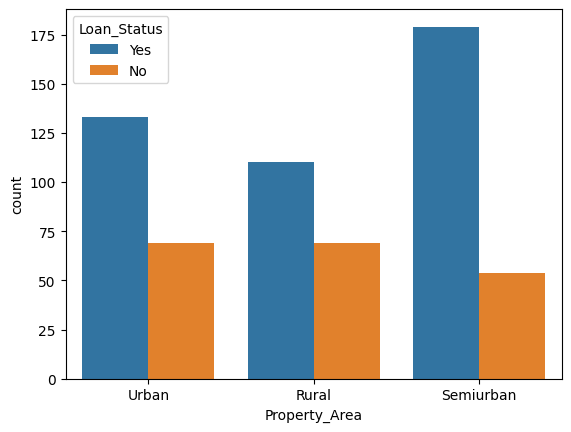

In [28]:
sns.countplot(data=data, x="Property_Area",hue="Loan_Status")

People in the semiurban area are applying for loans in comparison to urban and rural areas.

In [29]:
pd.crosstab(data["Property_Area"],data["Loan_Status"],margins=True)

Loan_Status,No,Yes,All
Property_Area,,,
Rural,69,110,179
Semiurban,54,179,233
Urban,69,133,202
All,192,422,614


<Axes: xlabel='Property_Area', ylabel='count'>

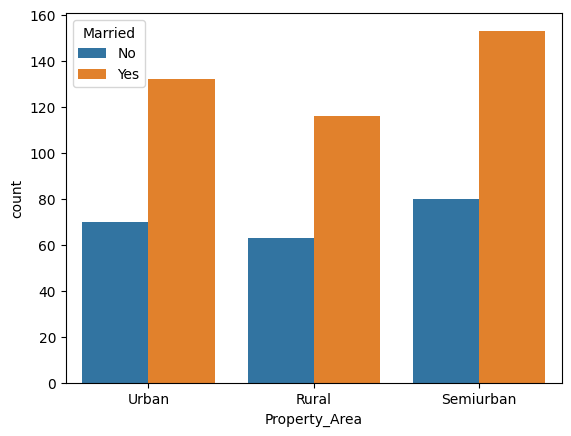

In [30]:
sns.countplot(data=data, x="Property_Area",hue="Married")

In [31]:
pd.crosstab(data["Property_Area"],data["Married"],margins=True)

Married,No,Yes,All
Property_Area,,,
Rural,63,116,179
Semiurban,80,153,233
Urban,70,132,202
All,213,401,614


<Axes: xlabel='Property_Area', ylabel='count'>

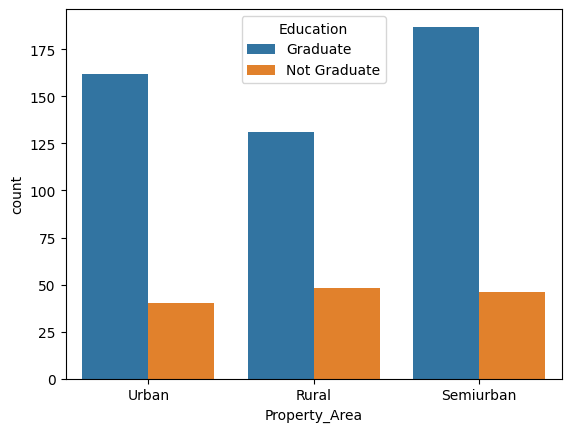

In [32]:
sns.countplot(data=data, x="Property_Area",hue="Education")

People in the semiurban area are well educated

In [33]:
pd.crosstab(data["Property_Area"],data["Education"],margins=True)

Education,Graduate,Not Graduate,All
Property_Area,,,
Rural,131,48,179
Semiurban,187,46,233
Urban,162,40,202
All,480,134,614


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

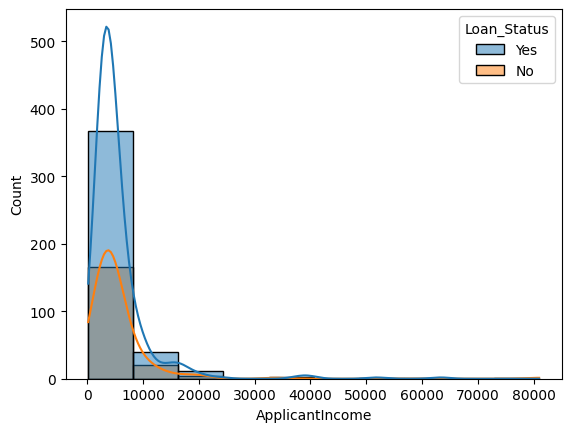

In [34]:
sns.histplot(data = data,x = 'ApplicantIncome' , kde = True , bins =10,hue = 'Loan_Status')

In [35]:
data.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
No     5446.078125
Yes    5384.068720
Name: ApplicantIncome, dtype: float64

On the histogram, we can see that those people whose salary above **5446** have a strong chances of getting a loan authorized.

In [36]:
data[data['ApplicantIncome']>5446.078125]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Yes
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Yes
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,No
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.000000,360.0,0.0,Urban,No
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.000000,360.0,1.0,Urban,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.000000,360.0,1.0,Urban,Yes
602,LP002953,Male,Yes,3,Graduate,No,5703,0.0,128.000000,360.0,1.0,Urban,Yes
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.000000,360.0,1.0,Semiurban,Yes
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Yes


<Axes: xlabel='Credit_History', ylabel='Count'>

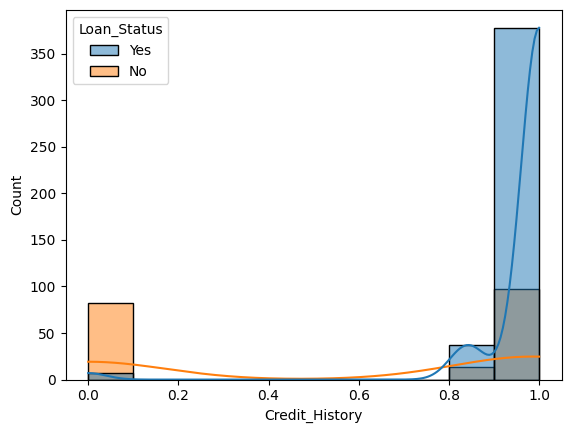

In [37]:
sns.histplot(data = data,x = 'Credit_History' , kde = True , bins =10,hue = 'Loan_Status')

In [38]:
data.groupby('Loan_Status')['Credit_History'].mean()

Loan_Status
No     0.562232
Yes    0.969577
Name: Credit_History, dtype: float64

Those whose credit history is more than 0.562232 have an excellent chances of getting a loan approved

In [39]:
data[data['Credit_History']>0.562232]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Yes
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,No
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Yes
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Yes
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural,Yes
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Yes
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Yes
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Yes


<Axes: >

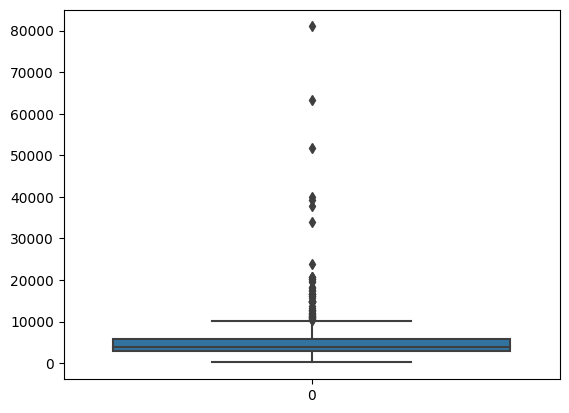

In [40]:
sns.boxplot(data["ApplicantIncome"]) #finding outlier

<Axes: >

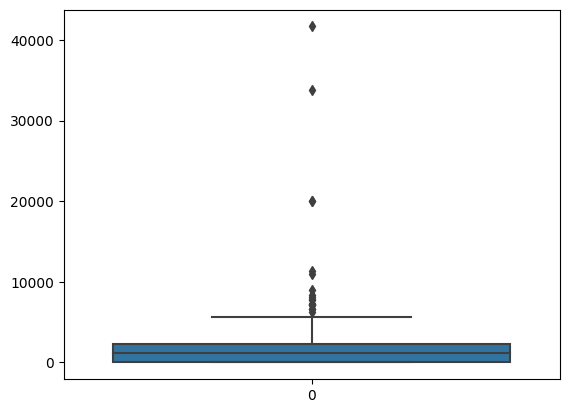

In [41]:
sns.boxplot(data["CoapplicantIncome"]) #finding outlier

<Axes: >

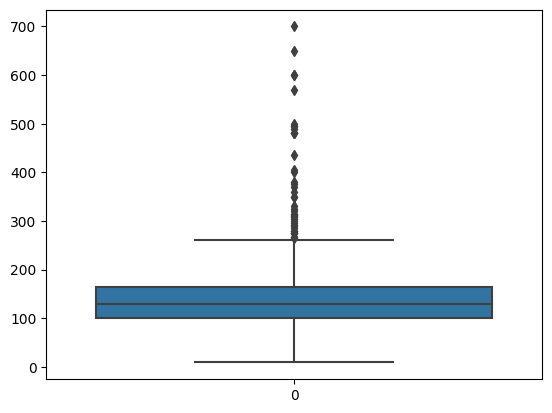

In [42]:
sns.boxplot(data["LoanAmount"]) #finding outlier

<Axes: >

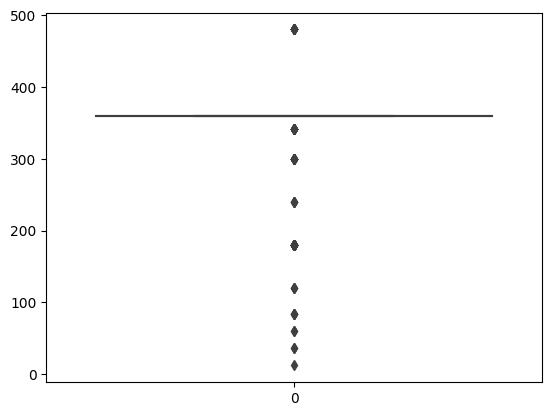

In [43]:
sns.boxplot(data["Loan_Amount_Term"]) #finding outlier

<Axes: >

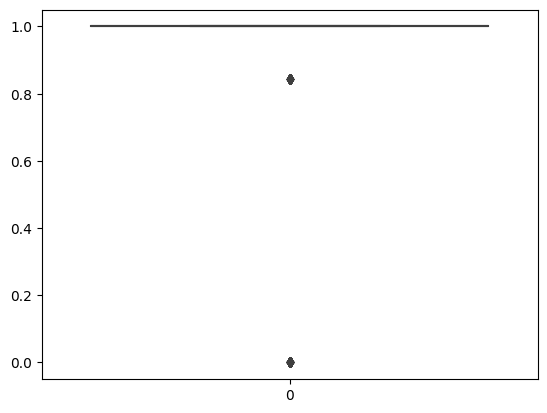

In [44]:
sns.boxplot(data["Credit_History"]) #finding outlier

# **Processing**

1.Drop

2.Converting data

3.spliting into independent & Dependent Feature

In [45]:
data.drop(["Loan_ID"], axis=1, inplace=True)

In [46]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Yes
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,No
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Yes
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Yes
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Yes
610,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Yes
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Yes
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Yes


In [47]:
data["Gender"]=data["Gender"].replace({"Male":0,"Female":1})
data["Married"]=data["Married"].replace({"No":0,"Yes":1})
data["Education"]=data["Education"].replace({"Not Graduate":0,"Graduate":1})
data["Self_Employed"]=data["Self_Employed"].replace({"No":0,"Yes":1})
data["Property_Area"]=data["Property_Area"].replace({"Urban":0,"Semiurban":1,"Rural":3})
data["Loan_Status"]=data["Loan_Status"].replace({"No":0,"Yes":1})
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,3,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,3,1
610,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,3,1
611,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
612,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


convert data into numeric from.

In [48]:
X=data.drop(columns=['Loan_Status'],axis=1)
Y=data['Loan_Status']

In [49]:
Column=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]

**1.**Now, we create an object for the numeric feature.

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=20)

In [52]:
Y_train.value_counts()

Loan_Status
1    306
0    123
Name: count, dtype: int64

In [53]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=20)

In [54]:
X_train_os,Y_train_os=os.fit_resample(X_train,Y_train)
Y_train_os.value_counts()

Loan_Status
1    306
0    306
Name: count, dtype: int64

# **Model Building**

1.Logistic Regression

2.Support vector machine (SVM)


**Logistic Regression**

**-------------------------**

In [55]:
log=LogisticRegression()

In [56]:
log.fit(X_train_os,Y_train_os)

LogisticRegression()

In [57]:
log_pred = log.predict(X_test)
log_cm= confusion_matrix(Y_test,log_pred)
log_acc= accuracy_score(Y_test,log_pred)*100
log_prec=precision_score(Y_test,log_pred)*100
log_rec=recall_score(Y_test,log_pred)*100
log_f1=f1_score(Y_test,log_pred)*100
print("accuracy_score: ", log_acc)
print("precision_score: ", log_prec)
print("recall_score: ", log_rec)
print("f1_score: ", log_f1)
print("confusion_matrix: \n", log_cm)

accuracy_score:  74.5945945945946
precision_score:  76.33587786259542
recall_score:  86.20689655172413
f1_score:  80.97165991902834
confusion_matrix: 
 [[ 38  31]
 [ 16 100]]


In [58]:
print(classification_report(Y_test,log_pred))

              precision    recall  f1-score   support

           0       0.70      0.55      0.62        69
           1       0.76      0.86      0.81       116

    accuracy                           0.75       185
   macro avg       0.73      0.71      0.71       185
weighted avg       0.74      0.75      0.74       185



**Support vector machine (SVM)**

**-----------------------------------**

In [59]:
svm=SVC()

In [60]:
svm.fit(X_train_os,Y_train_os)

SVC()

In [61]:
svm_pred = svm.predict(X_test)
svm_cm= confusion_matrix(Y_test,svm_pred)
svm_acc= accuracy_score(Y_test,svm_pred)*100
svm_prec=precision_score(Y_test,svm_pred)*100
svm_rec=recall_score(Y_test,svm_pred)*100
svm_f1=f1_score(Y_test,svm_pred)*100
print("accuracy_score: ", svm_acc)
print("precision_score: ", svm_prec)
print("recall_score: ", svm_rec)
print("f1_score: ", svm_f1)
print("confusion_matrix: \n", svm_cm)

accuracy_score:  55.67567567567567
precision_score:  62.142857142857146
recall_score:  75.0
f1_score:  67.96875
confusion_matrix: 
 [[16 53]
 [29 87]]


In [62]:
print(classification_report(Y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.36      0.23      0.28        69
           1       0.62      0.75      0.68       116

    accuracy                           0.56       185
   macro avg       0.49      0.49      0.48       185
weighted avg       0.52      0.56      0.53       185



# **Observation**

**1.**From the above chart we can see that our target vairable distribution is highly imblanced.

**2.**Majority of the customers is geting loan approved **(Yes)** 68.7%.

**3.**Only 31.3% has **(Not)** loan not approved.

**4.**Those who are married have higher chances of getting a loan approved.

**5.**Those that are educated are better able to get their loans approved.

**6.**People in the semiurban area are applying for loans in comparison to urban and rural areas.

**7.**People in the semiurban area are well educated.

**8.**On the histogram, we can see that those people whose salary above 5446 have a strong chances of getting a loan authorized.

**9.**Those whose credit history is more than 0.562232 have an excellent chances of getting a loan approved.

**10.** Outliers are present but are not considered as error points.


**11.** the tested algorithms **(Logistic Regression, Support Vetor machine )**, LogisticRegression giving me Training accuracy **(74.5%)**.